In [0]:
import tensorflow as tf

In [0]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 30kB/s 
     |████████████████████████████████| 1.3MB 46.5MB/s 
     |████████████████████████████████| 450kB 64.2MB/s 
     |████████████████████████████████| 3.8MB 37.7MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: protobuf 3.7.1
    Uninstalling protobuf-3.7.1:
      Successfully uninstalled protobuf-3.7.1
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oauthlib-0.4.0
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [0]:
print('words:', train_data[0])
print('label:', train_labels[0])

('words:', [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
('label:', 1)


In [0]:
word_index = imdb.get_word_index()
print(word_index)

1654784/1641221 [==============================] - 0s 0us/step
{u'fawn': 34701, u'tsukino': 52006, u'nunnery': 52007, u'sonja': 16816, u'vani': 63951, u'woods': 1408, u'spiders': 16115, u'hanging': 2345, u'woody': 2289, u'trawling': 52008, u"hold's": 52009, u'comically': 11307, u'localized': 40830, u'disobeying': 30568, u"'royale": 52010, u"harpo's": 40831, u'canet': 52011, u'aileen': 19313, u'acurately': 52012, u"diplomat's": 52013, u'rickman': 25242, u'rumbustious': 52014, u'familiarness': 52015, u"spider'": 52016, u'hahahah': 68804, u"wood'": 52017, u'transvestism': 40833, u"hangin'": 34702, u'screaming': 1927, u'seamier': 40834, u'wooded': 34703, u'bravora': 52018, u'grueling': 16817, u'wooden': 1636, u'wednesday': 16818, u"'prix": 52019, u'altagracia': 34704, u'circuitry': 52020, u'crotch': 11585, u'busybody': 57766, u"tart'n'tangy": 52021, u'pantheistic': 52022, u'thrace': 52023, u"tom's": 11038, u'snuggles': 52025, u"frasier's": 52026, u'complainers': 52027, u'templarios': 52125

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decorded_review= ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decorded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Preparing Data Set

In [0]:
def vectorized_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results
  


In [0]:
x_train=vectorized_sequences(train_data)
x_test=vectorized_sequences(test_data)

In [0]:
x_train.shape

(25000, 10000)

In [0]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

Building Model


In [0]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #this will give 1 output because it's a binary classification that means yes or no
                                                  #sigmoid fn will give number b/w 0 or 1 

W0304 16:58:54.810612 140213554743168 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#handout cross validation method
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#In this method data will break into 3 parts train , validation and test.
#so that testing data will be secret at all for model. data will not be leaked



In [0]:
x_val.shape

(10000, 10000)

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W0304 16:59:06.297939 140213554743168 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/sample - loss: 0.5034 - acc: 0.7869 - val_loss: 0.3800 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.2956 - acc: 0.9055 - val_loss: 0.3025 - val_acc: 0.8870
Epoch 3/20
15000/15000 [==============================] - 2s 118us/sample - loss: 0.2150 - acc: 0.9298 - val_loss: 0.2767 - val_acc: 0.8910
Epoch 4/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.1722 - acc: 0.9430 - val_loss: 0.2765 - val_acc: 0.8888
Epoch 5/20
15000/15000 [==============================] - 2s 120us/sample - loss: 0.1382 - acc: 0.9554 - val_loss: 0.2863 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 2s 118us/sample - loss: 0.1157 - acc: 0.9637 - val_loss: 0.2961 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 2s 117us/sample - loss: 0.0971 - acc: 0.9703 - val_l

In [0]:
history_dict = history.history
print(history_dict)

{'acc': [0.78693336, 0.9055333, 0.9298, 0.943, 0.9554, 0.9637333, 0.97026664, 0.9784, 0.98373336, 0.9864, 0.99086666, 0.9936, 0.99413335, 0.99553335, 0.99733335, 0.99733335, 0.9997333, 0.99826664, 0.9984667, 0.99986666], 'loss': [0.5034374421914418, 0.29560395614306134, 0.2149562217315038, 0.1722401949564616, 0.138212584177653, 0.11569331329663594, 0.09705499524275461, 0.07855857710043589, 0.06542186371882756, 0.05479233985344569, 0.04234897882143657, 0.033571841541926065, 0.028799233021338782, 0.02278358308772246, 0.017980991240839163, 0.015417628357807795, 0.008256079655637344, 0.010693709109971921, 0.008395436407253145, 0.00363687868801256], 'val_acc': [0.8687, 0.887, 0.891, 0.8888, 0.8869, 0.8848, 0.8823, 0.8822, 0.8809, 0.8768, 0.8591, 0.8686, 0.8725, 0.8724, 0.8705, 0.8701, 0.8673, 0.8663, 0.8673, 0.8663], 'val_loss': [0.3799557032585144, 0.3025232753753662, 0.2766515264749527, 0.2765068315982819, 0.2863177734375, 0.2961128125190735, 0.3137136593341827, 0.3326815947055817, 0.3637

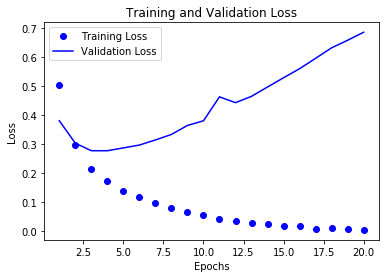

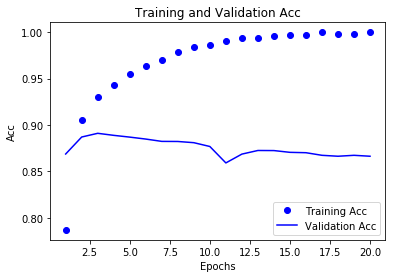

In [0]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()


In [0]:
model.predict(x_test)

array([[0.00546879],
       [1.        ],
       [0.9869485 ],
       ...,
       [0.00194493],
       [0.00723574],
       [0.5537759 ]], dtype=float32)